In [3]:

import os
os.chdir('..')

In [6]:


import sys
import os
print(os.getcwd())

from domid.tasks.task_weah import NodeTaskWEAH
from domid.arg_parser import mk_parser_main
from domid.dsets.dset_weah import DsetWEAH
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

/home/mariia.sidulova/scdn/DomId


In [5]:
sys.path.insert(0,'/home/mariia.sidulova/scdn/DomId')
sys.path.insert(0, '/home/mariia.sidulova/scdn/DomId/DomainLab')

In [23]:
import pandas as pd
data = pd.read_csv('../../Aperio_dataset_v10.csv')

In [24]:

column_names = ['path', 'subject', 'region', 'ann', 'resp', 'age', 'BMI', 'CAH']
new_df = pd.DataFrame(columns = column_names)

In [25]:
sub_counter = -1
for ii in range(70, len(data)):
    print(ii, 'out of', len(data))
    name = data['Filename of initial Aperio slide'][ii]
    if name[0]=='A':
        name_ = 'aperio'+name[6:12]
        path = '../../data_Outside/png_files/Training/'+name_
        if os.path.exists(path):
            sub_counter+=1
            region_set =[]
            for img in os.listdir(path): 
                if img[0]=='a':
                    if img.split('_')[5]!='Aug': #not augmented
                        region_set_ =[]
                        region_set_ = region_set+[img.split('_')[4]]
                    
                        if len(set(region_set_))<5:
                            region_set.append(img.split('_')[4])
                            
                            responder = data['Responder'][ii]
                            age = data['Age at dx'][ii]
                            BMI = data['BMI'][ii]
                            
                            region_label_ = img.split('_')[4][1:]
                            if region_label_=='CAH':
                                region_label = 0
                            elif region_label_=='Carcinoma':
                                region_label =1
                            else:
                                region_lbel = 3
                            if responder == 'Y':
                                resp = 1
                            else:
                                resp = 0
                            ann = int(img.split('_')[2])

                            row ={'path':img, 'subject':sub_counter,'region':img.split('_')[4], 'ann':ann, 'resp':resp, 'age':age, 'BMI':BMI, 'CAH':region_label}
                            #new_df=new_df.append(row, ignore_index=True)
            
                            df_new_row = pd.DataFrame(row, index=[0])
                      
                            new_df = pd.concat([new_df, df_new_row], axis=0, ignore_index=True)
    
        print(len(set(region_set)), len(region_set_))
    if sub_counter>35:
        break
                        
                    #print(row)

print(new_df)



70 out of 112
4 1201
71 out of 112
4 1200
72 out of 112
4 1201
73 out of 112
4 1201
74 out of 112
2 600
75 out of 112
4 1200
76 out of 112
4 1200
77 out of 112
3 610
78 out of 112
4 1200
79 out of 112
4 1201
80 out of 112
4 1201
81 out of 112
2 600
82 out of 112
2 600
83 out of 112
2 600
84 out of 112
3 900
85 out of 112
4 1200
86 out of 112
4 1201
87 out of 112
2 600
88 out of 112
4 1201
89 out of 112
4 1200
90 out of 112
4 1200
91 out of 112
92 out of 112
93 out of 112
94 out of 112
95 out of 112
96 out of 112
97 out of 112
98 out of 112
99 out of 112
100 out of 112
101 out of 112
102 out of 112
103 out of 112
104 out of 112
105 out of 112
106 out of 112
107 out of 112
108 out of 112
109 out of 112
110 out of 112
111 out of 112
                                                   path subject region ann  \
0        aperio-114-0_anno_2_reg_1CAH_patchnumber_0.png       0   1CAH   2   
1        aperio-114-0_anno_2_reg_1CAH_patchnumber_1.png       0   1CAH   2   
2       aperio-114-0_anno_

<Axes: >

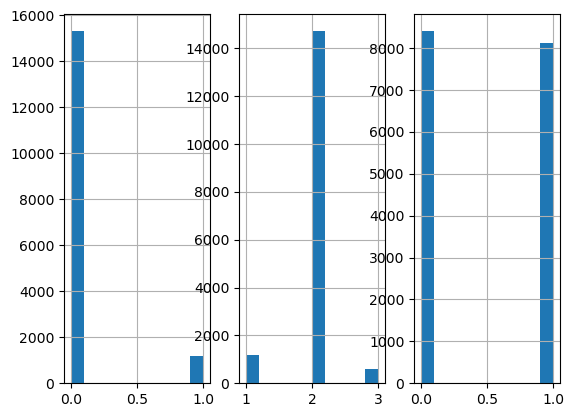

In [26]:
plt.figure()
plt.subplot(1, 3, 1)
new_df['CAH'].hist()
plt.subplot(1, 3, 2)
new_df['ann'].hist()
plt.subplot(1, 3, 3)
new_df['resp'].hist()


In [12]:
for ii in range(0, 35):

    print('subject', new_df[new_df['subject']==ii].iloc[0,:])
    print(len(new_df[new_df['subject']==ii]))


subject path       aperio-001-0_anno_2_reg_1CAH_patchnumber_1.png
subject                                                 0
region                                               1CAH
ann                                                     2
resp                                                    1
age                                                  39.0
BMI                                                  37.3
CAH                                                     1
Name: 0, dtype: object
1200
subject path       aperio-002-0_anno_2_reg_7CAH_patchnumber_142.png
subject                                                   1
region                                                 7CAH
ann                                                       2
resp                                                      1
age                                                    28.0
BMI                                                    28.2
CAH                                                       1
Name: 1200, 

IndexError: single positional indexer is out-of-bounds

In [34]:
new_df.to_csv('../../dset_WEAH.csv')

In [48]:
2700/150


18.0

In [23]:
new_df[new_df['subject']==4]

,path,subject,region,ann,resp,age,BMI,CAH
